In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import normalize
import numpy as np
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(device)

mps


In [2]:
EPOCHS=5
BATCH_SIZE=32
LEARNING_RATE=.003
df = pd.read_csv('dataset/train.csv')

y = df['target'].values

del df['target']
del df['ID_code']
X = df.values

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X,y)

(array([134816.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  15184.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

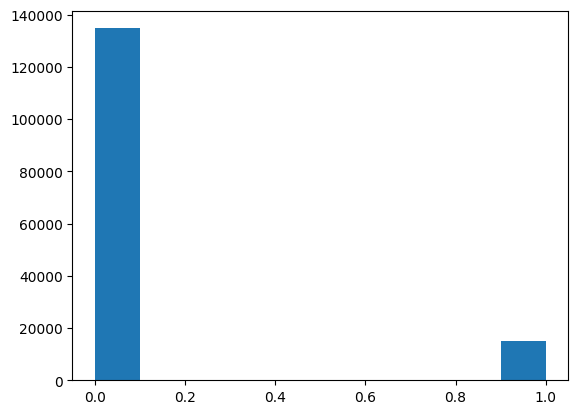

In [3]:
plt.hist(y_train)

In [4]:
print(f"y_train[:10]:{y_train[:10]}")
print(f"X_train[:10]:{X_train[:10]}")

print(f"y_test[:10]:{y_test[:10]}")
print(f"X_test[:10]:{X_test[:10]}")

y_train[:10]:[0 0 1 0 0 0 0 0 0 0]
X_train[:10]:[[ 0.05297498 -0.02109075  0.0576271  ...  0.04622376  0.09143946
   0.00327425]
 [ 0.04440048  0.02134786  0.06512337 ...  0.06425629  0.09403282
  -0.05742665]
 [ 0.04712394 -0.02744262  0.07369834 ...  0.06358745  0.08798493
   0.02392065]
 ...
 [ 0.07971218 -0.03996552  0.03564397 ...  0.04192872  0.09501301
  -0.02738403]
 [ 0.08403659 -0.02225589  0.0811258  ...  0.0473577   0.09014025
   0.01971774]
 [ 0.06852685 -0.00685806  0.05853511 ...  0.04886353  0.07278877
   0.04264284]]
y_test[:10]:[1 0 0 0 1 0 0 0 0 0]
X_test[:10]:[[ 0.04606019  0.03284163  0.07998436 ...  0.05137648  0.06748664
   0.06308276]
 [ 0.03494915 -0.03672656  0.0604417  ...  0.04546976  0.12070895
  -0.05339329]
 [ 0.03984217 -0.03394048  0.06080147 ...  0.05172488  0.08259098
  -0.10699404]
 ...
 [ 0.03802162 -0.0295824   0.0508397  ...  0.05442105  0.09058333
   0.07951499]
 [ 0.09209049  0.02456816  0.07517703 ...  0.05447633  0.11434878
  -0.02333692]
 [ 0

In [5]:
class TransactionsDataset(torch.utils.data.Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].astype(np.float32), self.y[idx].astype(np.float32)

dataset_train = TransactionsDataset(X_train,y_train)
dataset_test = TransactionsDataset(X_test,y_test)
dataloader_train = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE)
dataloader_test = torch.utils.data.DataLoader(dataset_test,batch_size=BATCH_SIZE)

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear_0 = torch.nn.Linear(200,1024)
        self.batch_norm_0 = torch.nn.BatchNorm1d(1024)
        self.relu_0 = torch.nn.ReLU(1024)
        self.linear_1 = torch.nn.Linear(1024,2048)
        self.batch_norm_1 = torch.nn.BatchNorm1d(2048)
        self.relu_1 = torch.nn.ReLU(2048)
        self.linear_2 = torch.nn.Linear(2048,1024)
        self.batch_norm_2 = torch.nn.BatchNorm1d(1024)
        self.relu_2 = torch.nn.ReLU(1024)
        self.dr_2 = torch.nn.Dropout1d(.2)
        self.linear_3 = torch.nn.Linear(1024,512)
        self.batch_norm_3 = torch.nn.BatchNorm1d(512)
        self.relu_3 = torch.nn.ReLU(512)
        self.linear_4 = torch.nn.Linear(512,256)
        self.batch_norm_4 = torch.nn.BatchNorm1d(256)
        self.relu_4 = torch.nn.ReLU(256)
        self.linear_5 = torch.nn.Linear(256,128)
        self.batch_norm_5 = torch.nn.BatchNorm1d(128)
        self.relu_5 = torch.nn.ReLU(128)
        self.dr_5 = torch.nn.Dropout1d(.2)
        self.linear_6 = torch.nn.Linear(128,64)
        self.batch_norm_6 = torch.nn.BatchNorm1d(64)
        self.relu_6 = torch.nn.ReLU(64)
        self.linear_7 = torch.nn.Linear(64,16)
        self.relu_7 = torch.nn.ReLU(16)
        self.batch_norm_7 = torch.nn.BatchNorm1d(16)
        self.linear_8 = torch.nn.Linear(16,1)
        self.relu_8 = torch.nn.ReLU(1)
    
    def forward(self,x):
        x = self.linear_0(x)
        x = self.batch_norm_0(x)
        x = self.relu_0(x)
        x = self.linear_1(x)
        x = self.batch_norm_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.batch_norm_2(x)
        x = self.relu_2(x)
        x = self.dr_2(x)
        x = self.linear_3(x)
        x = self.batch_norm_3(x)
        x = self.relu_3(x)
        x = self.linear_4(x)
        x = self.batch_norm_4(x)
        x = self.relu_5(x)
        x = self.dr_5(x)
        x = self.linear_5(x)
        x = self.batch_norm_5(x)
        x = self.relu_6(x)
        x = self.linear_6(x)
        x = self.batch_norm_6(x)
        x = self.relu_7(x)
        x = self.linear_7(x)
        x = self.batch_norm_7(x)
        x = self.relu_8(x)
        x = self.linear_8(x)
        return x
    

model = Model()
model.to(device)
checkpoint = None
# we need to add some weight to the success values because the labels are very unbalanced
loss = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([17.0/18.0]))
loss.to(device)
min_loss = None
optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer, min_loss, checkpoint):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    if not min_loss:
        min_loss = loss
        checkpoint = model
    if loss.item() < min_loss.item():
        min_loss = loss
        checkpoint = model
    print(f"Checkpoint training loss:{min_loss:>7f}")
    return model, optimizer, min_loss, checkpoint

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    preds = []
    targets = []
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            y = y.unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred = torch.sigmoid(pred)
            pred = torch.round(pred)
            correct += (pred == y).sum().item()
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    print(classification_report(targets,preds))
            

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
for i in range(EPOCHS):
    model, optimizer, min_loss, checkpoint = train_loop(dataloader_train, model, loss, optimizer, min_loss, checkpoint)
    test_loop(dataloader_test, model, loss)

Train loss: 0.572364  [   32/150000]
Train loss: 0.249085  [32032/150000]
Train loss: 0.455986  [64032/150000]
Train loss: 0.421858  [96032/150000]
Train loss: 0.358395  [128032/150000]
Checkpoint training loss:0.244461
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     45086
         1.0       0.89      0.02      0.04      4914

    accuracy                           0.90     50000
   macro avg       0.90      0.51      0.50     50000
weighted avg       0.90      0.90      0.86     50000

Test Error: 
 Accuracy: 90.4%, Avg loss: 0.238769 

Train loss: 0.302588  [   32/150000]
Train loss: 0.188206  [32032/150000]
Train loss: 0.387081  [64032/150000]
Train loss: 0.410054  [96032/150000]
Train loss: 0.327934  [128032/150000]
Checkpoint training loss:0.244461
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     45086
         1.0       0.97      0.01      0.02      4914

    accuracy     

In [9]:
print(f"Final checkpoint model loss: {min_loss.item()}")

Final checkpoint model loss: 0.2233591079711914


In [10]:
# Recall is less than ideal, but this dataset is fairly imbalanced toward 0 for the label.

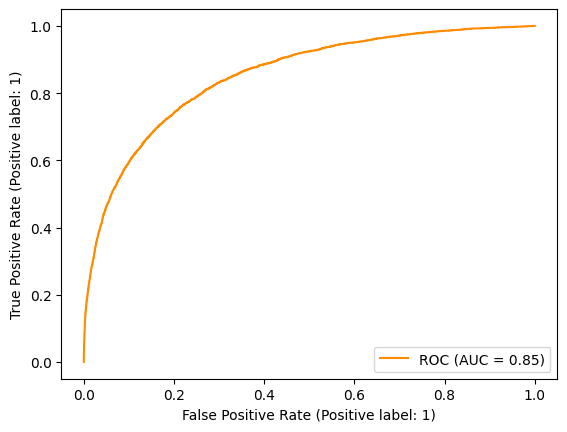

In [11]:
def get_roc_auc(dataloader_test, model):
    model.eval()
    preds = []
    targets = []
    with torch.no_grad():
        for X, y in dataloader_test:
            X = X.to(device)
            pred = model(X)
            pred = torch.sigmoid(pred)
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    RocCurveDisplay.from_predictions(
        targets,
        preds,
        name=f"ROC",
        color="darkorange",
    )
    auc = roc_auc_score(targets, preds)
    fps, tps, thresholds = roc_curve(targets, preds)
    return (auc, fps, tps, thresholds)


_ = get_roc_auc(dataloader_test, model)